In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import re

# initialize a dict to store the data
llm_performance = {
    "GPT": {"IMDB": 0.9415, "ISEAR": 0.70345, "FEVER": 0.7998},
    "LLAMA": {"IMDB": 0.93332, "ISEAR": 0.6823, "FEVER": 0.7715}
}

In [3]:
llm_name = 'LLAMA'
dataset_name = 'ISEAR'
log_dir = f"./paper_logs/{llm_name}/{dataset_name.lower()}-llama-small/"

# get all .log files in the directory
files = [f for f in os.listdir(log_dir) if f.endswith('.log')]
files.sort()
# divide the files into different cascade sizes
cascades = {}
for f in files:
    cascade_size = f.split('_')
    if '_'.join(cascade_size[0:-1]) not in cascades:
        cascades['_'.join(cascade_size[0:-1])] = []
    cascades['_'.join(cascade_size[0:-1])].append(f)
cascades

{'LR_BERT-base': ['LR_BERT-base_0.001400.log',
  'LR_BERT-base_0.001420.log',
  'LR_BERT-base_0.001440.log',
  'LR_BERT-base_0.001460.log',
  'LR_BERT-base_0.001480.log',
  'LR_BERT-base_0.001500.log',
  'LR_BERT-base_0.001520.log',
  'LR_BERT-base_0.001540.log',
  'LR_BERT-base_0.001560.log',
  'LR_BERT-base_0.001580.log',
  'LR_BERT-base_0.001600.log',
  'LR_BERT-base_0.001620.log',
  'LR_BERT-base_0.001640.log',
  'LR_BERT-base_0.001660.log',
  'LR_BERT-base_0.001680.log',
  'LR_BERT-base_0.001700.log',
  'LR_BERT-base_0.001720.log',
  'LR_BERT-base_0.001740.log',
  'LR_BERT-base_0.001760.log',
  'LR_BERT-base_0.001780.log',
  'LR_BERT-base_0.001800.log',
  'LR_BERT-base_0.001820.log',
  'LR_BERT-base_0.001840.log',
  'LR_BERT-base_0.001860.log',
  'LR_BERT-base_0.001880.log',
  'LR_BERT-base_0.001900.log',
  'LR_BERT-base_0.001920.log',
  'LR_BERT-base_0.001940.log',
  'LR_BERT-base_0.001960.log',
  'LR_BERT-base_0.001980.log',
  'LR_BERT-base_0.002000.log',
  'LR_BERT-base_0.00202

In [10]:
def plot_figure(cascade_logs, cascade_costs):
    plt.rcdefaults()
    # define figure size
    plt.figure(figsize=(6, 4.5))
    plt.rcParams["font.weight"] = "bold"
    # bold the x and y axis labels
    plt.rcParams["axes.labelweight"] = "bold"

    cascade_size = len(cascade_logs[0].split('_')) - 1
    print("cascade size: ", cascade_size)
    costs = []
    accus = []
    linear_accus = []
    # plot the data
    for f in cascade_logs:
        num_lines = sum(1 for line in open(log_dir + f))
        # read last line of the file
        with open(log_dir + f, 'r') as file:
            last_line = file.readlines()[-2]
        # data format: '''m1_prediction, m2_prediction, ..., llm_prediction, ground_truth, m1_proportion, m2_proportion, ..., m1_defer_prob, m2_defer_prob, ..., m1_score, m2_score, ..., m1_accuracy, m2_accuracy, llm_accuracy, overall_accuracy'''
        data = re.split(',', last_line.strip())
        model_prop = []
        linear_combination_acc = 0
        for k in range(cascade_size):
            model_prop.append(float(data[k + cascade_size + 2]))
            linear_combination_acc += float(data[k + cascade_size * 4 + 2]) * float(data[k + cascade_size + 2])
            
        llm_cost = 1 - sum(model_prop)
        model_accu = []
        for k in range(cascade_size):
            model_accu.append(float(data[k + cascade_size * 4 + 2]))
        llm_accuracy = float(data[k + cascade_size * 4 + 3])
        overall_accuracy = float(data[k + cascade_size * 4 + 4])
        linear_combination_acc += llm_accuracy * llm_cost
        print(f,int(llm_cost * num_lines), overall_accuracy)

        costs.append(llm_cost * num_lines)
        accus.append(overall_accuracy)
        linear_accus.append(linear_combination_acc)
        
    # sort the data then plot
    costs = np.array(costs)
    accus = np.array(accus)
    idx = np.argsort(costs)
    costs = costs[idx]
    accus = accus[idx]
    plt.plot(costs, accus, label = 'Online Cascade Learning')
    linear_accus = np.array(linear_accus)
    linear_accus = linear_accus[idx]
    # add llm as a horizontal dotted line
    plt.axhline(y=llm_performance[llm_name][dataset_name], color='g', linestyle='--', label = 'LLAMA 2')
    plt.plot(costs, linear_accus, label = 'Online Ensemble Learning')
    
    plt.xlabel('Cost Budget (number of llm calls)', fontsize=16, weight='bold')
    plt.title(dataset_name, weight='bold', fontsize=20)

    # write to pdf file
    size = "small" if cascade_size == 2 else "large"
    plt.savefig(dataset_name + '_' + size + '_' + llm_name + '_cascade.pdf', bbox_inches='tight')
    plt.show()

cascade size:  2
LR_BERT-base_0.001400.log 3833 0.6892
LR_BERT-base_0.001420.log 3833 0.6892
LR_BERT-base_0.001440.log 3833 0.6892
LR_BERT-base_0.001460.log 3833 0.6892
LR_BERT-base_0.001480.log 3833 0.6892
LR_BERT-base_0.001500.log 3833 0.6892
LR_BERT-base_0.001520.log 3833 0.6892
LR_BERT-base_0.001540.log 3833 0.6892
LR_BERT-base_0.001560.log 3833 0.6892
LR_BERT-base_0.001580.log 3833 0.6892
LR_BERT-base_0.001600.log 3833 0.6892
LR_BERT-base_0.001620.log 3833 0.6892
LR_BERT-base_0.001640.log 3833 0.6892
LR_BERT-base_0.001660.log 3833 0.6892
LR_BERT-base_0.001680.log 3833 0.6892
LR_BERT-base_0.001700.log 3833 0.6892
LR_BERT-base_0.001720.log 3833 0.6892
LR_BERT-base_0.001740.log 3833 0.6892
LR_BERT-base_0.001760.log 3833 0.6892
LR_BERT-base_0.001780.log 3833 0.6892
LR_BERT-base_0.001800.log 3833 0.6892
LR_BERT-base_0.001820.log 3833 0.6892
LR_BERT-base_0.001840.log 3833 0.6892
LR_BERT-base_0.001860.log 3833 0.6892
LR_BERT-base_0.001880.log 3833 0.6892
LR_BERT-base_0.001900.log 3833 0.

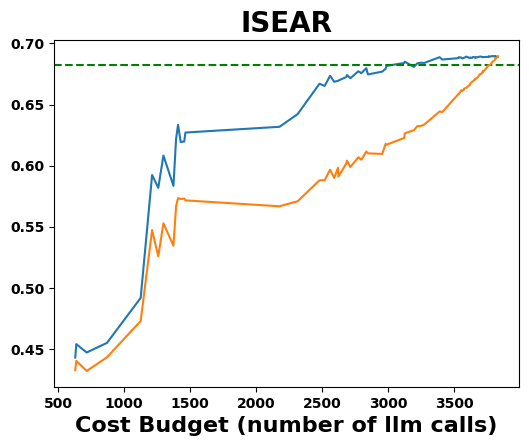

In [11]:
cascade_name = 'LR_BERT-base'
cascade_logs = cascades[cascade_name]
cascade_costs = {
    "GPT": [1, 1182],
    "LLAMA": [1, 636]
}

plot_figure(cascade_logs, cascade_costs)

In [12]:
cascade_name = 'LR_BERT-base_BERT-large'
cascade_logs = cascades[cascade_name]
cascade_costs = {
    "GPT": [1, 3, 1182],
    "LLAMA": [1, 3, 636]
}

plot_figure(cascade_logs, cascade_costs)

KeyError: 'LR_BERT-base_BERT-large'